In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
url = 'https://raw.githubusercontent.com/jodyirawan/datasetclasification/main/audi.csv'
audi = pd.read_csv(url)
audi


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [3]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [4]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [5]:
tax = (audi.tax == 0).sum()
engineSize = (audi.engineSize == 0).sum()

print("Nilai 0 di kolom tax ada: ", tax) 
print("Nilai 0 di kolom engineSize ada: ", engineSize)

Nilai 0 di kolom tax ada:  536
Nilai 0 di kolom engineSize ada:  57


In [6]:
# Drop baris dengan nilai 'tax', 'engineSize' = 0
audi = audi.loc[(audi[['tax', 'engineSize']]!=0).all(axis=1)]
 
# Cek ukuran data untuk memastikan baris sudah di-drop
audi.shape

(10075, 9)

In [7]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000,10075.000000
mean,2017.174789,23480.728337,23979.084963,132.612407,49.419027,1.965042
std,2.174335,11674.774635,23193.314150,62.315554,10.974784,0.588302
min,1997.000000,1490.000000,1.000000,20.000000,18.900000,1.000000
25%,2016.000000,15995.000000,5573.000000,145.000000,40.900000,1.500000
50%,2017.000000,20956.000000,17713.000000,145.000000,49.600000,2.000000
75%,2019.000000,28422.500000,35127.500000,145.000000,56.500000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,156.900000,6.300000


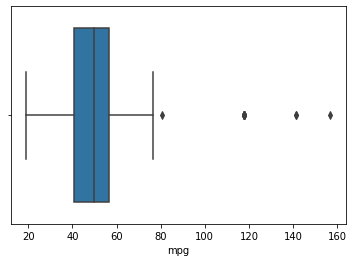

In [8]:
sns.boxplot(x=audi['mpg'])

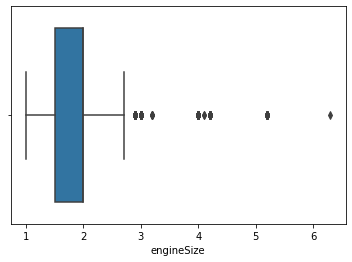

In [9]:
sns.boxplot(x=audi['engineSize'])

In [10]:
Q1 = audi.quantile(0.25)
Q3 = audi.quantile(0.75)
IQR=Q3-Q1
audi=audi[~((audi<(Q1-1.5*IQR))|(audi>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
audi.shape

(4537, 9)

In [11]:
numerical_features = ['price', 'year',	'mileage',	'tax',	'mpg',	'engineSize']
categorical_features = ['model', 'transmission', 'fuelType']

      jumlah sampel  persentase
 Q3             859        18.9
 A3             721        15.9
 Q2             645        14.2
 A4             631        13.9
 A5             544        12.0
 Q5             384         8.5
 A1             355         7.8
 A6             261         5.8
 TT             114         2.5
 RS3             11         0.2
 A7              10         0.2
 S3               2         0.0


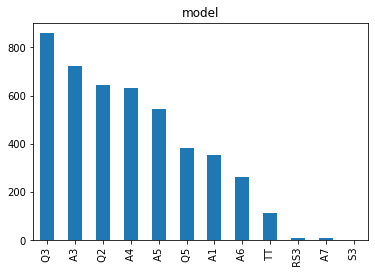

In [12]:
feature = categorical_features[0]
count = audi[feature].value_counts()
percent = 100*audi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

           jumlah sampel  persentase
Semi-Auto           1665        36.7
Manual              1576        34.7
Automatic           1296        28.6


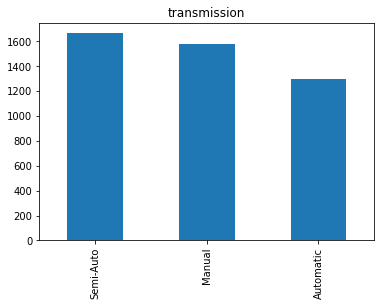

In [13]:
feature = categorical_features[1]
count = audi[feature].value_counts()
percent = 100*audi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

        jumlah sampel  persentase
Petrol           2546        56.1
Diesel           1991        43.9


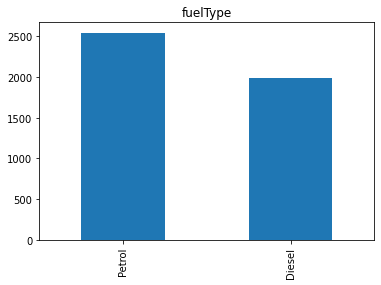

In [14]:
feature = categorical_features[2]
count = audi[feature].value_counts()
percent = 100*audi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

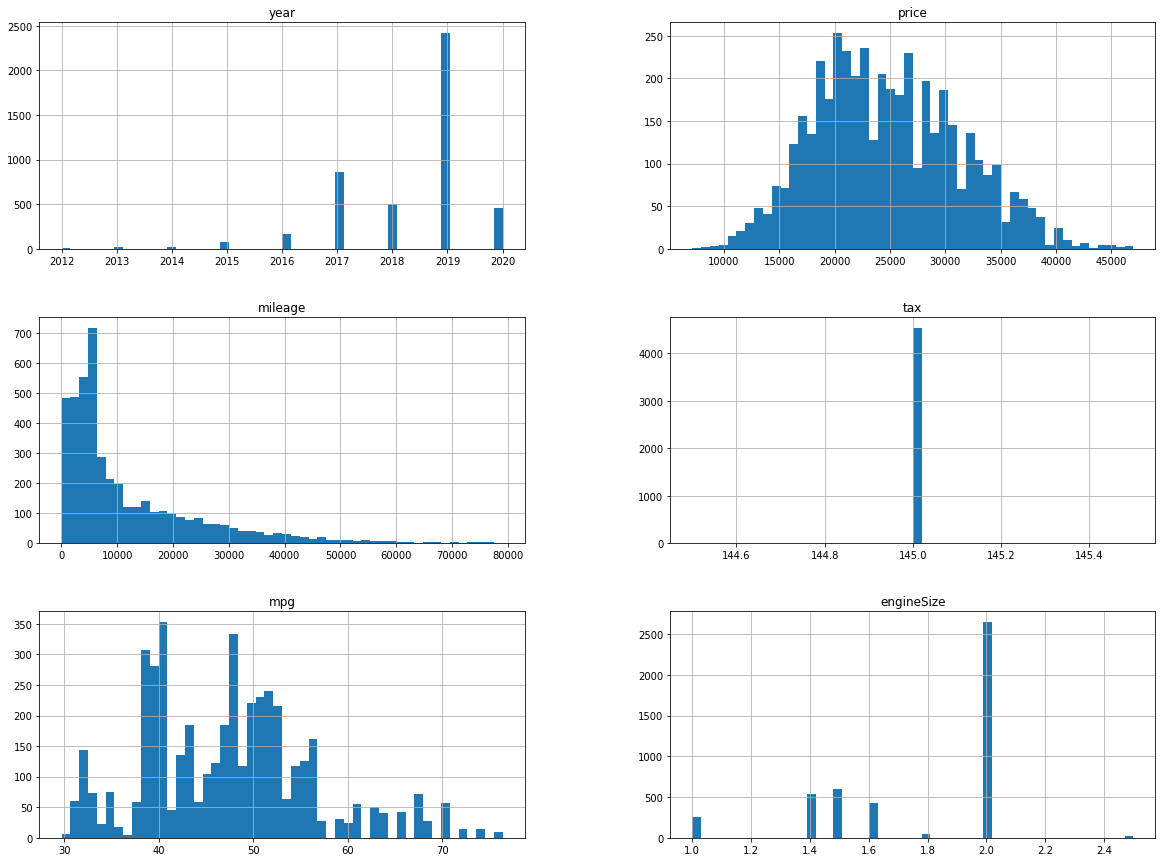

In [15]:
audi.hist(bins=50, figsize=(20,15))
plt.show()

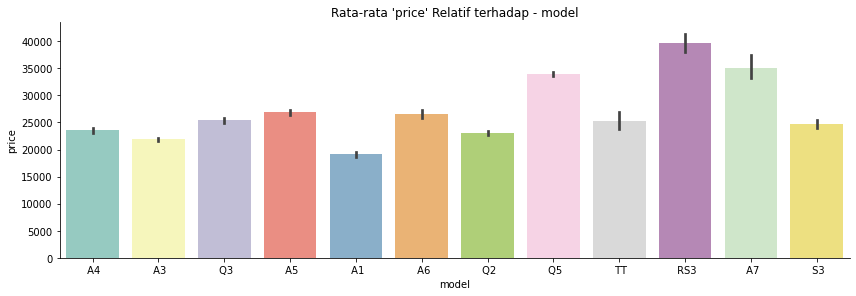

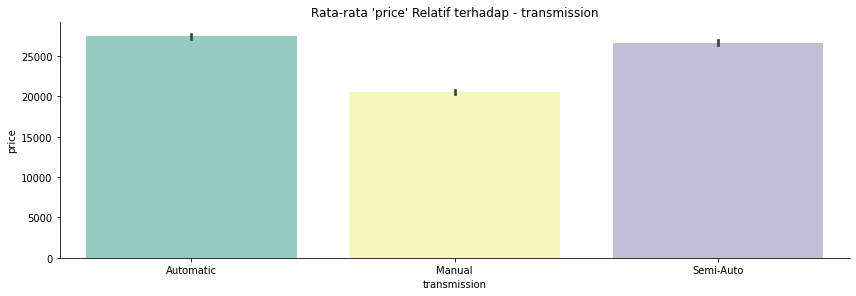

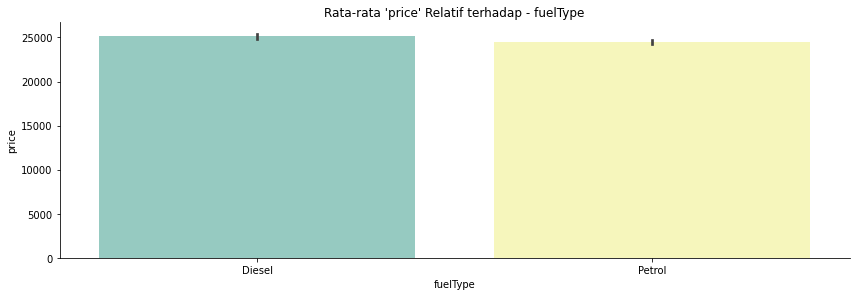

In [16]:
cat_features = audi.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=audi, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

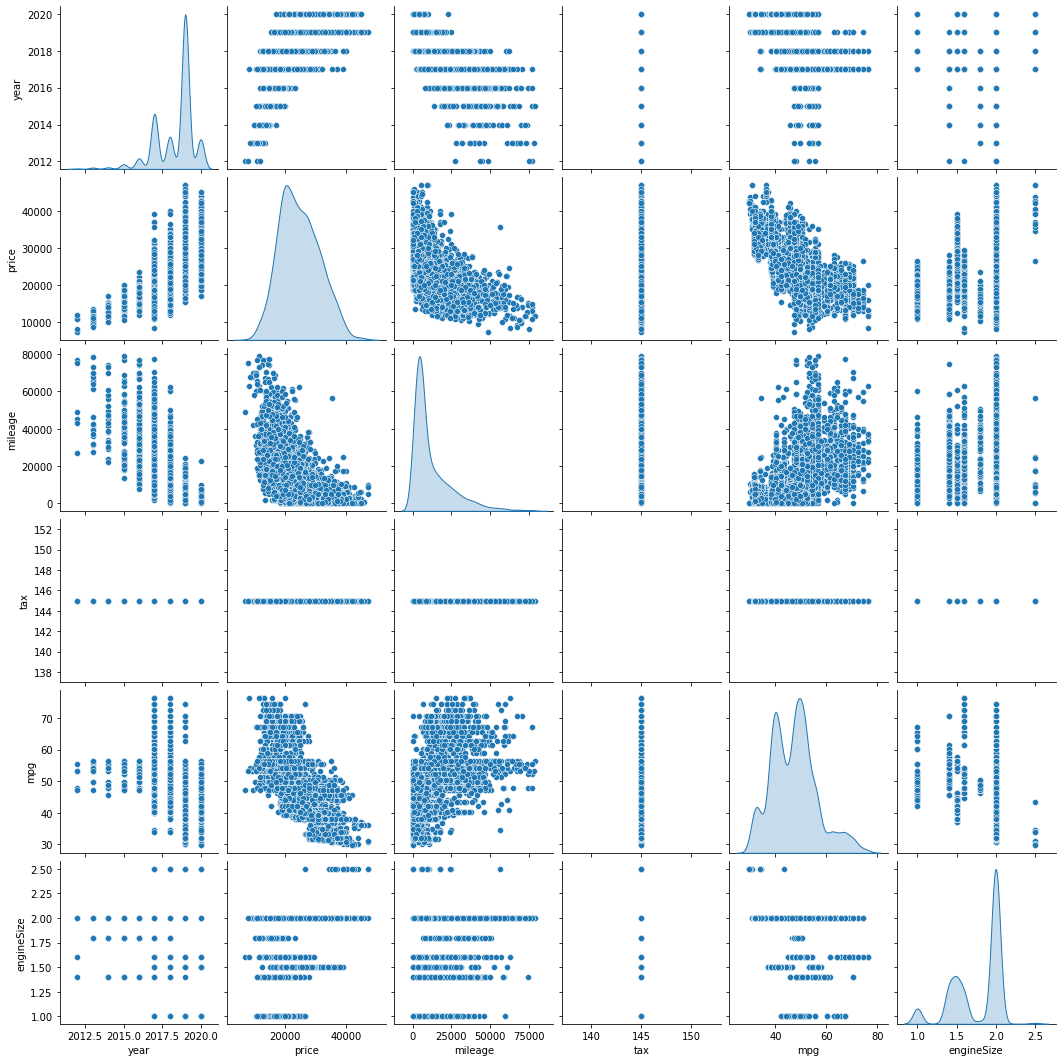

In [17]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(audi, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

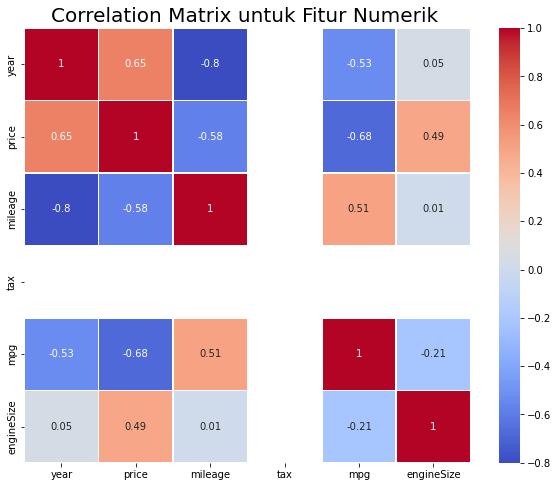

In [18]:
plt.figure(figsize=(10, 8))
correlation_matrix = audi.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [19]:
audi.drop(['tax'], inplace=True, axis=1)
audi.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
10,A3,2017,16100,Manual,28955,Petrol,58.9,1.4
12,Q3,2016,17000,Manual,44915,Diesel,52.3,2.0
15,A3,2017,14500,Automatic,26156,Petrol,58.9,1.4


In [20]:
from sklearn.preprocessing import  OneHotEncoder
audi = pd.concat([audi, pd.get_dummies(audi['model'], prefix='model', drop_first=True)],axis=1)
audi = pd.concat([audi, pd.get_dummies(audi['transmission'], prefix='transmission', drop_first=True)],axis=1)
audi = pd.concat([audi, pd.get_dummies(audi['fuelType'], prefix='fuelType', drop_first=True)],axis=1)
audi.drop(['model','transmission','fuelType'], axis=1, inplace=True)
audi.head()

,year,price,mileage,mpg,engineSize,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ Q2,model_ Q3,model_ Q5,model_ RS3,model_ S3,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol
3,2017,16800,25952,67.3,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,49.6,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
10,2017,16100,28955,58.9,1.4,1,0,0,0,0,0,0,0,0,0,0,1,0,1
12,2016,17000,44915,52.3,2.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
15,2017,14500,26156,58.9,1.4,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
from sklearn.model_selection import train_test_split
 
X = audi.drop(["price"],axis =1)
y = audi["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [22]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4537
Total # of sample in train dataset: 4083
Total # of sample in test dataset: 454


In [23]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['mpg', 'engineSize']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,mpg,engineSize
1369,0.567423,-1.183479
10271,0.354382,0.106986
1936,-0.565058,-0.860863
5776,-0.901439,0.752218
4484,2.069923,0.752218


In [24]:
X_train[numerical_features].describe().round(4)

,mpg,engineSize
count,4083.0000,4083.0000
mean,-0.0000,-0.0000
std,1.0001,1.0001
min,-1.9666,-2.4739
25%,-0.7669,-0.8609
50%,0.0741,0.7522
75%,0.4665,0.7522
max,3.2697,2.3653


In [25]:
# Siapkan daraframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [26]:
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

In [27]:
# Impor library yang dibutuhkan
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [28]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [29]:
## Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [30]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,18720.2,23180
RF,970.295,4183.72
Boosting,11460.7,12122.1


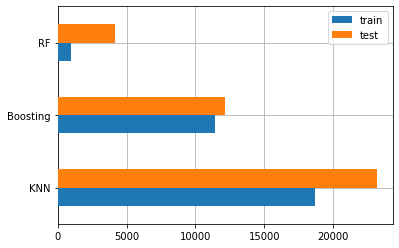

In [31]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [32]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
4603,31750,26951.7,31732.2,33771.1
